In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [185]:
# ouvre le fichier csv
df = pd.read_csv("titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [186]:
# Voir la répartition des valeurs nulles pour chaque colonne
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [187]:
# remplacer les valeurs manquantes pour l'age par la mediane des ages
df['Age'] = df['Age'].fillna(df['Age'].median())

In [188]:
# enlever les colonnes inutilies
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)


In [189]:
#supprimer les deux lignes sans valeurs pour Embarked
df.dropna(subset=["Embarked"], inplace=True)

In [190]:
# Voir la répartition des valeurs nulles pour chaque colonne
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [191]:
# transforme des variables quantitatives en dummy variables
df = pd.get_dummies(df
, columns=['Pclass', 'Sex', 'Embarked'], dtype=int, drop_first=True)

In [192]:
df

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,1,0,1,0,1
887,1,19.0,0,0,30.0000,0,0,0,0,1
888,0,28.0,1,2,23.4500,0,1,0,0,1
889,1,26.0,0,0,30.0000,0,0,1,0,0


In [193]:
x_quanti = df[['Age', 'SibSp', 'Parch', 'Fare']]
x_quali = df.drop(['Survived', 'Age', 'SibSp', 'Parch', 'Fare'], axis=1)
y = df['Survived']

In [194]:
x_quanti = (x_quanti - x_quanti.mean()) / x_quanti.std()

In [195]:
x_quanti

,Age,SibSp,Parch,Fare
0,-0.563357,0.431108,-0.474059,-0.499958
1,0.668840,0.431108,-0.474059,0.788503
2,-0.255308,-0.474932,-0.474059,-0.486376
3,0.437803,0.431108,-0.474059,0.422623
4,0.437803,-0.474932,-0.474059,-0.483861
...,...,...,...,...
886,-0.178295,-0.474932,-0.474059,-0.384258
887,-0.794394,-0.474932,-0.474059,-0.042189
888,-0.101283,0.431108,2.004991,-0.173986
889,-0.255308,-0.474932,-0.474059,-0.042189


In [196]:
# moyenne et l'écart-type
x_quanti.mean(), x_quanti.std()

(Age      2.797412e-16
 SibSp   -7.992607e-18
 Parch   -4.795564e-17
 Fare     1.358743e-16
 dtype: float64,
 Age      1.0
 SibSp    1.0
 Parch    1.0
 Fare     1.0
 dtype: float64)

In [197]:
X = pd.concat([x_quanti, x_quali], axis=1)

In [198]:
X

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,-0.563357,0.431108,-0.474059,-0.499958,0,1,1,0,1
1,0.668840,0.431108,-0.474059,0.788503,0,0,0,0,0
2,-0.255308,-0.474932,-0.474059,-0.486376,0,1,0,0,1
3,0.437803,0.431108,-0.474059,0.422623,0,0,0,0,1
4,0.437803,-0.474932,-0.474059,-0.483861,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...
886,-0.178295,-0.474932,-0.474059,-0.384258,1,0,1,0,1
887,-0.794394,-0.474932,-0.474059,-0.042189,0,0,0,0,1
888,-0.101283,0.431108,2.004991,-0.173986,0,1,0,0,1
889,-0.255308,-0.474932,-0.474059,-0.042189,0,0,1,0,0


In [199]:
# faire un split de X
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [200]:
# voir les tailles des splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((711, 9), (178, 9), (711,), (178,))

In [201]:
# entrainer un modèle de régression logistique
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [202]:
y_pred_lr = logreg.predict(X_test)
y_pred_lr

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1])

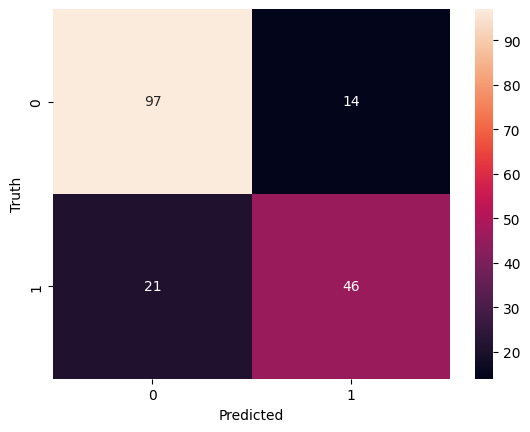

In [203]:
# représentation graphique de la matrice de confusion
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [204]:
# evaluer le modèle
accuracy_score(y_test, y_pred_lr)

0.8033707865168539

In [205]:
# calculer le recall, precision et f1-score
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       111
           1       0.77      0.69      0.72        67

    accuracy                           0.80       178
   macro avg       0.79      0.78      0.79       178
weighted avg       0.80      0.80      0.80       178



In [206]:
# Faire une version avec un arbre de décision
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [207]:
y_pred_arbre = dt.predict(X_test)
y_pred_arbre

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1])

In [208]:
# calculer le recall, precision et f1-score
print(classification_report(y_test, y_pred_arbre))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       111
           1       0.72      0.73      0.73        67

    accuracy                           0.79       178
   macro avg       0.78      0.78      0.78       178
weighted avg       0.79      0.79      0.79       178



In [209]:
# faure une version avec un random forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [210]:
#y_pred_rf = rf.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_rf

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1])

In [211]:
# calculer le recall, precision et f1-score
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86       111
           1       0.76      0.81      0.78        67

    accuracy                           0.83       178
   macro avg       0.82      0.83      0.82       178
weighted avg       0.83      0.83      0.83       178



In [212]:
# faire une version avec un SVM
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [213]:
y_pred_svm = svm.predict(X_test)
y_pred_svm

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1])

In [214]:
# calculer le recall, precision et f1-score
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       111
           1       0.77      0.72      0.74        67

    accuracy                           0.81       178
   macro avg       0.81      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178



In [215]:
# Faire un modèle non supervisé
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [216]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [217]:
# entrainer le modèle
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
23/23 [==============================] - 1s 6ms/step - loss: 0.6769 - accuracy: 0.5513
Epoch 2/100
23/23 [==============================] - 0s 5ms/step - loss: 0.6658 - accuracy: 0.6076
Epoch 3/100
23/23 [==============================] - 0s 5ms/step - loss: 0.6272 - accuracy: 0.6357
Epoch 4/100
23/23 [==============================] - 0s 5ms/step - loss: 0.6274 - accuracy: 0.6414
Epoch 5/100
23/23 [==============================] - 0s 5ms/step - loss: 0.6080 - accuracy: 0.6681
Epoch 6/100
23/23 [==============================] - 0s 5ms/step - loss: 0.5918 - accuracy: 0.6906
Epoch 7/100
23/23 [==============================] - 0s 5ms/step - loss: 0.6037 - accuracy: 0.6610
Epoch 8/100
23/23 [==============================] - 0s 5ms/step - loss: 0.5903 - accuracy: 0.6850
Epoch 9/100
23/23 [==============================] - 0s 6ms/step - loss: 0.5650 - accuracy: 0.6948
Epoch 10/100
23/23 [==============================] - 0s 7ms/step - loss: 0.5763 - accuracy: 0.6892
Epoch 11/

In [218]:
# evaluer le modèle
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 4ms/step - loss: 0.3769 - accuracy: 0.8315


[0.37687742710113525, 0.8314606547355652]

6/6 [==============================] - 0s 2ms/step


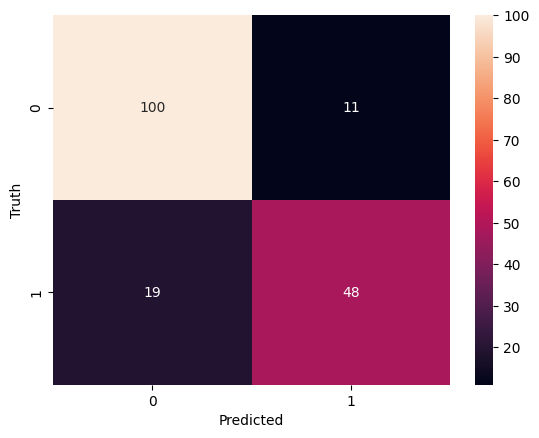

In [219]:
# représenter graphiquement la matrice de confusion
y_pred_ann = model.predict(X_test)
y_pred_ann = (y_pred_ann > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred_ann)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [220]:
# un modele avec des transformations
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  

In [221]:
#utilise un transformateur pour normaliser les données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [222]:
# entrainer le modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32)

Epoch 1/100
23/23 [==============================] - 1s 5ms/step - loss: 0.7106 - accuracy: 0.5373
Epoch 2/100
23/23 [==============================] - 0s 5ms/step - loss: 0.6629 - accuracy: 0.6034
Epoch 3/100
23/23 [==============================] - 0s 5ms/step - loss: 0.6135 - accuracy: 0.7117
Epoch 4/100
23/23 [==============================] - 0s 6ms/step - loss: 0.5995 - accuracy: 0.6906
Epoch 5/100
23/23 [==============================] - 0s 6ms/step - loss: 0.5700 - accuracy: 0.7257
Epoch 6/100
23/23 [==============================] - 0s 5ms/step - loss: 0.5644 - accuracy: 0.7229
Epoch 7/100
23/23 [==============================] - 0s 4ms/step - loss: 0.5547 - accuracy: 0.7482
Epoch 8/100
23/23 [==============================] - 0s 5ms/step - loss: 0.5350 - accuracy: 0.7539
Epoch 9/100
23/23 [==============================] - 0s 6ms/step - loss: 0.5212 - accuracy: 0.7722
Epoch 10/100
23/23 [==============================] - 0s 4ms/step - loss: 0.5332 - accuracy: 0.7567
Epoch 11/

In [223]:
# evaluer le modèle
model.evaluate(X_test_scaled, y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.3840 - accuracy: 0.8315


[0.3840259313583374, 0.8314606547355652]

6/6 [==============================] - 0s 3ms/step


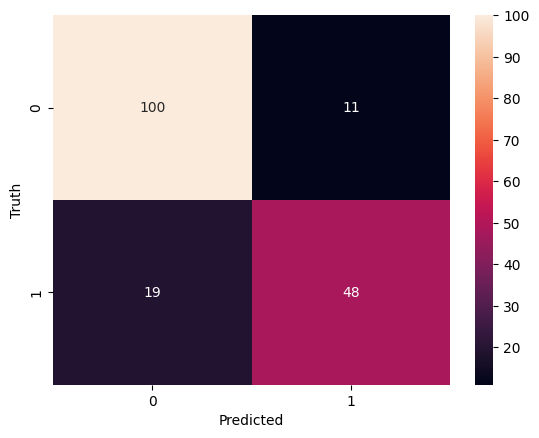

In [224]:
# représenter graphiquement la matrice de confusion
y_pred_ann = model.predict(X_test_scaled)
y_pred_ann = (y_pred_ann > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred_ann)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [225]:
# calculer le recall, precision et f1-score
print(classification_report(y_test, y_pred_ann))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       111
           1       0.81      0.72      0.76        67

    accuracy                           0.83       178
   macro avg       0.83      0.81      0.82       178
weighted avg       0.83      0.83      0.83       178



In [229]:
# sauvegarder le modèle
model.save('model_ann.h5')

/home/guypi/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [230]:
# k-means
from sklearn.cluster import KMeans

In [231]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)

/home/guypi/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [232]:
# prédire les clusters
y_pred_kmeans = kmeans.predict(X_test)

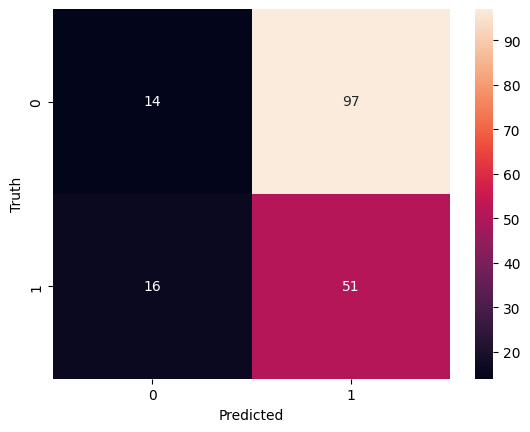

In [233]:
# représenter graphiquement la matrice de confusion
cm = confusion_matrix(y_test, y_pred_kmeans)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [234]:
# calculer le recall, precision et f1-score
print(classification_report(y_test, y_pred_kmeans))

              precision    recall  f1-score   support

           0       0.47      0.13      0.20       111
           1       0.34      0.76      0.47        67

    accuracy                           0.37       178
   macro avg       0.41      0.44      0.34       178
weighted avg       0.42      0.37      0.30       178

